# North Korea Missile Test Analysis using Folium
#By- Aarush Kumar
#Dated: July 26,2021

In [1]:
from IPython.display import Image
Image(url='https://static.dw.com/image/50190311_401.jpg')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import warnings
warnings.filterwarnings('ignore')
import folium
from folium import Marker, TileLayer
import calendar
import seaborn as sns
import matplotlib.pyplot as plt   
from matplotlib import gridspec
import matplotlib as mpl
!pip install openpyxl

In [3]:
CSV = '/home/aarush100616/Downloads/Projects/North Korea Missile Test Analysis/north_korea_missile_tests_database_050217.csv'
df = pd.read_csv(CSV, index_col = "F1")
df = df.drop(columns=['Additional Information','Source(s)'])
df = df.drop_duplicates()
df['Facility Latitude'] = pd.to_numeric(df['Facility Latitude'], errors='coerce')
df['Facility Longitude'] = pd.to_numeric(df['Facility Longitude'], errors='coerce')
df['Apogee (km)'] = pd.to_numeric(df['Apogee (km)'], errors='coerce')
df['Distance Travelled (km)'] = pd.to_numeric(df['Distance Travelled (km)'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'])
df['Date Entered/Updated'] = pd.to_datetime(df['Date Entered/Updated'])
df = df.drop([13, 14, 4, 41, 27,1, 84, 78,91,87,45]) #deledted duplicated same date, if alternative has more detail data
df['Apogee (km)'][77] = 17.0 #Cross check data added
df['Year'] = df['Date'].dt.year
df['Month_Num'] = df['Date'].dt.month
df['Month'] = df['Month_Num'].apply(lambda x: calendar.month_abbr[x])
df["# Test"] = 1
df['YYYYMM'] = pd.to_datetime(df['Date'], format='%Y%m', errors='coerce')
df['YYYYMM'] = pd.to_datetime(df['Date']).dt.strftime('%Y%m')

In [4]:
# Load dataset - Life Expectancy
CSV_LE = '/home/aarush100616/Downloads/Projects/North Korea Missile Test Analysis/Life Expectancy Data.csv'
le = pd.read_csv(CSV_LE, delimiter=',')
le = le[le['Country'].isin(["Democratic People's Republic of Korea", 'Republic of Korea', 'Russian Federation', 'United States of America', 'Japan', 'China'])]
le = le[le['Year'] == 2015]
le = le.replace("Democratic People's Republic of Korea", "North Korea")
le = le.replace("Republic of Korea", "South Korea")
le = le.replace("Russian Federation", "Russia")
le = le.replace("United States of America", "USA")
le = le[['Country', 'Life expectancy ', 'Adult Mortality']]
le['Adult Mortality'] = le['Adult Mortality']/1000
fig = plt.figure(figsize=(12,7))
ax1 = sns.scatterplot(data=le, x="Adult Mortality", y="Life expectancy ", s=250, color="darkred")
# For adding name every dot
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']-0.005, point['y']+0.4, str(point['val']))
label_point(le["Adult Mortality"], le["Life expectancy "], le["Country"], plt.gca()) 
vals = ax1.get_xticks()
ax1.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
ax1 = plt.gca().spines['right'].set_visible(False)
ax1 = plt.gca().spines['top'].set_visible(False)
ax1 = plt.gca().spines['left'].set_visible(True)
ax1 = plt.gca().spines['bottom'].set_visible(True)
ax1 = plt.ylabel("Life expectancy (Age)")
ax1 = plt.xlabel("Adult Mortality% (probability of dying between 15 and 60 years)")
ax1 = plt.title('Unit: Age and Mortality%\n2015', fontsize = 9, loc='right')
ax1 = plt.title('Life expectancy & Adult Mortality% from WHO',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30);

This data is based on 2015, which is the most recent data from the WHO (World Health Organization) dataset on Kaggle. Countries surrounding North Korea (As a result of analyzing life expectancy and adult mortality in a total of six countries, the average life expectancy in North Korea is similar to that of China, but the adult mortality rate is better than Russia.

In [5]:
CSV_MP = '/home/aarush100616/Downloads/Projects/North Korea Missile Test Analysis/World military power.csv'
mp = pd.read_csv(CSV_MP, header=1)
mp = mp[['Military Strength', 
         'Military Strength Power Index',
         'Aircraft Strength value',
         'Fighter/Interceptor Strength value',
         'Attack Aircraft Strength value',
         'Transport Aircraft Fleet Strength value', 
         'Trainer Aircraft Fleet value', 
         'Helicopter Fleet Strength value',
         'Attack Helicopter Fleet Strength value',
         'Tank Strength value', 'AFV/APC Strength value',
         'Self-Propelled Artillery Strength value', 
         'Towed Artillery Strength value', 
         'Rocket Projector Strength value',
         'Navy Fleet Strengths value', 
         'Aircraft Carrier Fleet Strength value',
         'Submarine Fleet Strength value',
         'Destroyer Fleet Strength value', 
         'Frigate Fleet Strength value', 
         'defense spending budget value', 
         'External Debt value',
         'Airport Totals value', 
         'Oil Production value',
         'Oil Consumption value',
         'Proven Oil Reserves value',
         'Available Manpower value', 
         'Total Population value', 
         'Total Square Land Area value', 
         'Total Coastline Coverage value', 
         'Total Waterway Coverage value',
         'Total Border Coverage value']]
mp = mp.rename(columns = {'Military Strength': "Country"}, inplace=False)
mp = mp[mp['Country'].isin(["North Korea", 'South Korea', 'Russia', 'United States', 'Japan', 'China'])]
mp = mp.replace("United States", "USA")
mp["defense spending budget value"] = mp["defense spending budget value"].str.replace(",","").astype('float64')
fig = plt.figure(figsize=(12,7))
ax1 = sns.scatterplot(data=mp, x="Military Strength Power Index", y="defense spending budget value", s=250, color="darkred")
ax1.invert_xaxis()
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1 = plt.gca().spines['right'].set_visible(False)
ax1 = plt.gca().spines['top'].set_visible(False)
ax1 = plt.gca().spines['left'].set_visible(True)
ax1 = plt.gca().spines['bottom'].set_visible(True)
ax1 = plt.text(0.055, 740000000000, 'USA', fontsize=11, color='black')
ax1 = plt.text(0.062, 230000000000, 'China', fontsize=11, color='black')
ax1 = plt.text(0.062, 47000000000, 'Russia', fontsize=11, color='black')
ax1 = plt.text(0.142, 60000000000, 'South Korea', fontsize=11, color='black')
ax1 = plt.text(0.142, 30000000000, 'Japan', fontsize=11, color='black')
ax1 = plt.text(0.365, 100000000, 'North Korea', fontsize=11, color='black')
ax1 = plt.text(0.075, -100000000000, 'Strongest->', fontsize=11, color='black')
ax1 = plt.text(0.390, -100000000000, '<-Weekest', fontsize=11, color='black')
ax1 = plt.title('Unit: Index and USD\nglobalfirepower.com (2020)', fontsize = 9, loc='right')
ax1 = plt.title('World Military Power',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30); 

## Missile Test

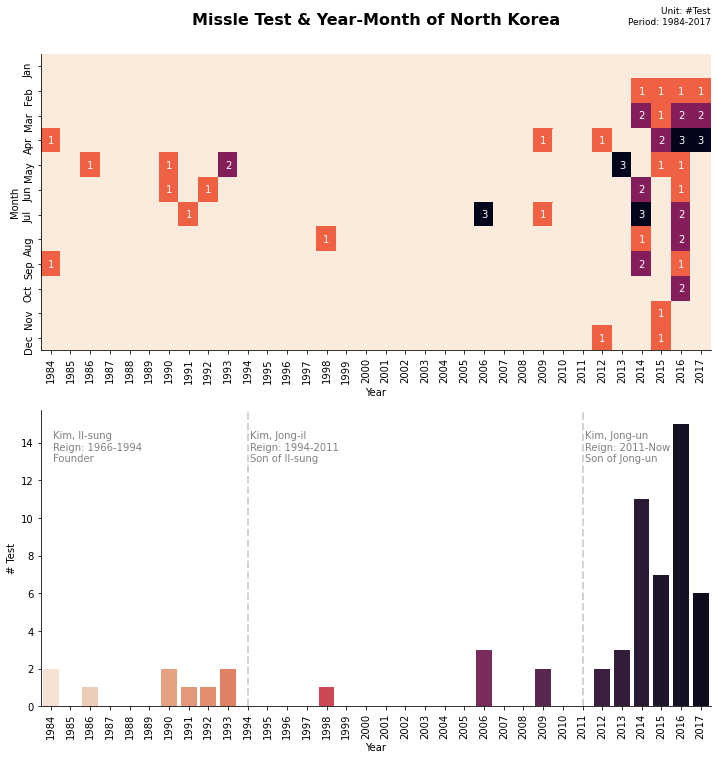

In [6]:
df_hm = pd.pivot_table(df, values="# Test", index=['Year', 'Month'], aggfunc=np.sum)
df_hm.reset_index(level=0, inplace=True)
df_hm.reset_index(level=0, inplace=True)
df_hm['Month'] = df_hm['Month'].astype('category')
#To add non-test month on the graph
idx = pd.date_range("1984-01-01", periods=408, freq="M")
ts = pd.Series(range(len(idx)), index=idx)
ts = pd.DataFrame(ts)
ts = ts.reset_index().drop(columns=[0])
ts.rename(columns = {"index": "ALL_DATE"}, inplace=True)
ts['Year'] = ts['ALL_DATE'].dt.year
ts['Month_Num'] = ts['ALL_DATE'].dt.month
ts['Month'] = ts['Month_Num'].apply(lambda x: calendar.month_abbr[x])
all_df = pd.merge(left=ts, right=df_hm, how='left', on=['Year','Month'], sort=False)
all_df.fillna(0)
df_heatmap = all_df.pivot("Month", "Year", "# Test").fillna(0)
df_heatmap = df_heatmap.reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
labels =  df_heatmap.astype('int64').astype('str').replace("0", "")
fig = plt.figure(figsize=(12,12))
ax1 = plt.subplot(2,1,1)
ax1 = sns.heatmap(df_heatmap, vmin=0, vmax=3, linewidths=0, cmap = "rocket_r", cbar=False, annot=labels, fmt = '')
ax1 = plt.gca().spines['right'].set_visible(False)
ax1 = plt.gca().spines['top'].set_visible(False)
ax1 = plt.gca().spines['left'].set_visible(True)
ax1 = plt.gca().spines['bottom'].set_visible(True)
plt.title('Unit: #Test\nPeriod: 1984-2017', fontsize = 9, loc='right')
plt.title('Missle Test & Year-Month of North Korea',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output
grouped = all_df.groupby('Year')
Counter = grouped.sum().reset_index()
ax2 = plt.subplot(2,1,2)
ax2 = sns.barplot(x="Year", y="# Test", data=Counter, palette= "rocket_r")
ax2 = plt.gca().spines['right'].set_visible(False)
ax2 = plt.gca().spines['top'].set_visible(False)
ax2 = plt.gca().spines['left'].set_visible(True)
ax2 = plt.gca().spines['bottom'].set_visible(True)
ax2 = plt.xticks(rotation = 90)
ax2 = plt.axvline(10, 0, 15, color='lightgray', linestyle='--', linewidth='2')
ax2 = plt.axvline(27, 0, 15, color='lightgray', linestyle='--', linewidth='2')
ax2 = plt.text(0.1, 13, 'Kim, Il-sung\nReign: 1966-1994\nFounder', fontsize=10, color='gray')
ax2 = plt.text(10.1, 13, 'Kim, Jong-il\nReign: 1994-2011\nSon of Il-sung', fontsize=10, color='gray')
ax2 = plt.text(27.1, 13, 'Kim, Jong-un\nReign: 2011-Now\nSon of Jong-un', fontsize=10, color='gray')

In [7]:
Missle_Info = df[['Missile Name','Distance Travelled (km)','Apogee (km)', 'Year']]
Missle_Info = Missle_Info[Missle_Info['Distance Travelled (km)'].notna()]
Missle_Info = Missle_Info.fillna(df.mean())
plt.figure(figsize=(10,10))
ax= sns.set_theme(style="whitegrid")
ax= sns.jointplot(data=Missle_Info, x="Distance Travelled (km)", y="Apogee (km)",
              xlim=(-100, 1100), ylim=(-100, 1500), color="darkred");

<Figure size 720x720 with 0 Axes>

* Apogee (km) : missile's maximum altitude
* Distance Travelled (km) : missile's maximum distance

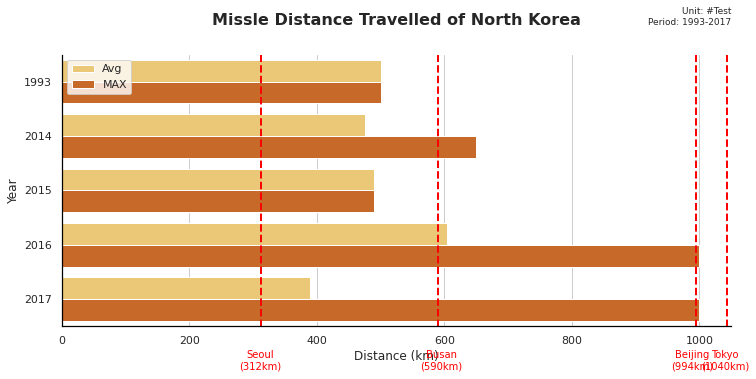

In [8]:
df_missle = df[['Year','Distance Travelled (km)']]
grouped = df_missle.groupby('Year')
df_range_max = grouped.max().reset_index()
df_range_max = df_range_max.dropna()
df_range_max.rename(columns = {"Distance Travelled (km)": "Distance (km)"}, inplace=True)
df_range_max['Category'] = "MAX"

df_missle = df[['Year','Distance Travelled (km)']]
grouped = df_missle.groupby('Year')
df_range_mean = grouped.mean().reset_index()
df_range_mean = df_range_mean.dropna()
df_range_mean.rename(columns = {"Distance Travelled (km)": "Distance (km)"}, inplace=True)
df_range_mean['Category'] = "Avg"

df_range = pd.concat([df_range_mean,df_range_max])

fig = plt.figure(figsize=(12,5))

ax1 = sns.barplot(x="Distance (km)", y="Year", hue="Category", data=df_range, orient="h", palette="YlOrBr")

ax1 = sns.set_theme(style="white")
ax1 = plt.gca().spines['right'].set_visible(False)
ax1 = plt.gca().spines['top'].set_visible(False)
ax1 = plt.gca().spines['left'].set_visible(True)
ax1 = plt.gca().spines['bottom'].set_visible(True)
ax1 = plt.gca().spines['left'].set_color('black')
ax1 = plt.gca().spines['bottom'].set_color('black')
ax1 = plt.axvline(312, -1, 5, color='red', linestyle='--', linewidth='2')
ax1 = plt.axvline(590, -1, 5, color='red', linestyle='--', linewidth='2')
ax1 = plt.axvline(994, -1, 5, color='red', linestyle='--', linewidth='2')
ax1 = plt.axvline(1043, -1, 5, color='red', linestyle='--', linewidth='2')
ax1 = plt.text(312, 5.3, 'Seoul\n(312km)', fontsize=10, color='red', horizontalalignment='center')
ax1 = plt.text(595, 5.3, 'Busan\n(590km)', fontsize=10, color='red', horizontalalignment='center')
ax1 = plt.text(988, 5.3, 'Beijing\n(994km)', fontsize=10, color='red', horizontalalignment='center')
ax1 = plt.text(1040, 5.3, 'Tokyo\n(1040km)', fontsize=10, color='red', horizontalalignment='center')
ax1 = plt.legend(loc='upper left')
plt.title('Unit: #Test\nPeriod: 1993-2017', fontsize = 9, loc='right')
plt.title('Missle Distance Travelled of North Korea',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30);

No handles with labels found to put in legend.


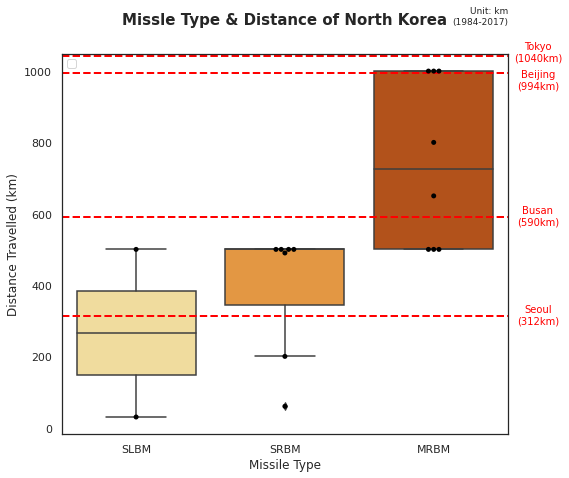

In [9]:
df_missle_group = df[['Missile Type','Distance Travelled (km)']].dropna()
df_missle_group = df_missle_group.drop([105,85])
df_missle_group = df_missle_group.sort_values(by='Distance Travelled (km)')

fig = plt.figure(figsize=(8,7))
ax1 = sns.boxplot(x="Missile Type", y="Distance Travelled (km)", data=df_missle_group, palette="YlOrBr")
ax1 = sns.swarmplot(x="Missile Type", y="Distance Travelled (km)", data=df_missle_group, color="0")
ax1 = plt.axhline(312, 0, 3.5, color='red', linestyle='--', linewidth='2')
ax1 = plt.axhline(590, 0, 3.5, color='red', linestyle='--', linewidth='2')
ax1 = plt.axhline(994, 0, 3.5, color='red', linestyle='--', linewidth='2')
ax1 = plt.axhline(1043, 0, 3.5, color='red', linestyle='--', linewidth='2')
ax1 = plt.text(2.7, 292, 'Seoul\n(312km)', fontsize=10, color='red', horizontalalignment='center')
ax1 = plt.text(2.7, 570, 'Busan\n(590km)', fontsize=10, color='red', horizontalalignment='center')
ax1 = plt.text(2.7, 950, 'Beijing\n(994km)', fontsize=10, color='red', horizontalalignment='center')
ax1 = plt.text(2.7, 1030, 'Tokyo\n(1040km)', fontsize=10, color='red', horizontalalignment='center')
ax1 = plt.legend(loc='upper left')
plt.title('Unit: km\n(1984-2017)', fontsize = 9, loc='right')
plt.title('Missle Type & Distance of North Korea',
          fontsize = 15,
          fontweight = 'heavy',
          loc='center', 
          pad=30);

* SLBM : Submarine-launched ballistic missile
* SRBM : Short-range ballistic missile
* MRBM : Medium-range ballistic missile

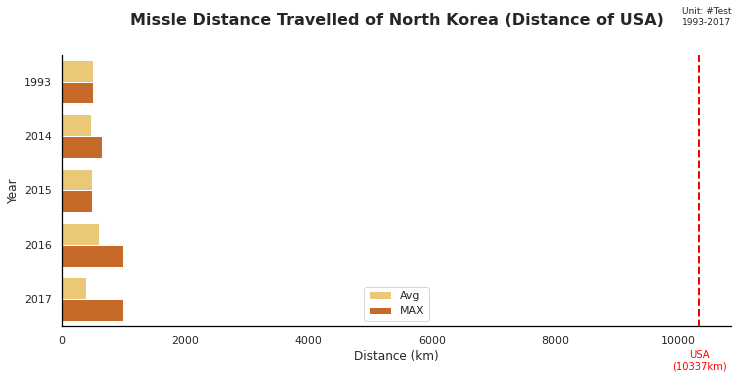

In [10]:
fig = plt.figure(figsize=(12,5))
ax1 = sns.barplot(x="Distance (km)", y="Year", hue="Category", data=df_range, orient="h", palette="YlOrBr")
ax1 = sns.set_theme(style="white")
ax1 = plt.gca().spines['right'].set_visible(False)
ax1 = plt.gca().spines['top'].set_visible(False)
ax1 = plt.gca().spines['left'].set_visible(True)
ax1 = plt.gca().spines['bottom'].set_visible(True)
ax1 = plt.gca().spines['left'].set_color('black')
ax1 = plt.gca().spines['bottom'].set_color('black')
ax1 = plt.axvline(10337, -1, 5, color='red', linestyle='--', linewidth='2')
ax1 = plt.text(10337, 5.3, 'USA\n(10337km)', fontsize=10, color='red', horizontalalignment='center')
ax1 = plt.legend(loc='best')
plt.title('Unit: #Test\n1993-2017', fontsize = 9, loc='right')
plt.title('Missle Distance Travelled of North Korea (Distance of USA)',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30);

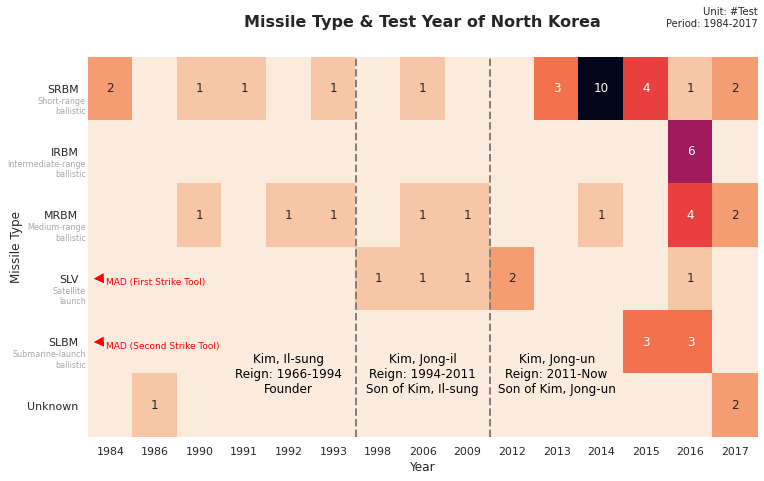

In [11]:
df_type = pd.pivot_table(df, values="# Test", index=['Year', 'Missile Type'], aggfunc=np.sum)

df_type.reset_index(level=0, inplace=True)
df_type.reset_index(level=0, inplace=True)
df_type = df_type.pivot("Missile Type", "Year", "# Test").fillna(0).astype('int64')
df_type = df_type.reindex(['SRBM','IRBM','MRBM','SLV','SLBM','Unknown'])
labels =  df_type.astype('int64').astype('str').replace("0", "")
fig = plt.figure(figsize=(12,7))

ax1 = sns.heatmap(df_type, vmin=0, vmax=10, linewidths=0, cmap = "rocket_r", cbar=False, annot=labels, fmt = '')
ax1 = plt.axvline(6, 0, 15, color='gray', linestyle='--', linewidth='2')
ax1 = plt.axvline(9, 0, 15, color='gray', linestyle='--', linewidth='2')

ax1 = plt.text(4.5, 5.3, 'Kim, Il-sung\nReign: 1966-1994\nFounder', fontsize=12, color='black', horizontalalignment='center')
ax1 = plt.text(7.5, 5.3, 'Kim, Jong-il\nReign: 1994-2011\nSon of Kim, Il-sung', fontsize=12, color='black', horizontalalignment='center')
ax1 = plt.text(10.5, 5.3, 'Kim, Jong-un\nReign: 2011-Now\nSon of Kim, Jong-un', fontsize=12, color='black', horizontalalignment='center')

ax1 = plt.text(-0.05, 0.78, 'Short-range\nballistic', fontsize=8, color='darkgray', horizontalalignment='right', verticalalignment='center')
ax1 = plt.text(-0.05, 1.78, 'Intermediate-range\nballistic', fontsize=8, color='darkgray', horizontalalignment='right', verticalalignment='center')
ax1 = plt.text(-0.05, 2.78, 'Medium-range\nballistic', fontsize=8, color='darkgray', horizontalalignment='right', verticalalignment='center')
ax1 = plt.text(-0.05, 3.78, 'Satellite\nlaunch', fontsize=8, color='darkgray', horizontalalignment='right', verticalalignment='center')
ax1 = plt.text(-0.05, 4.78, 'Submarine-launch\nballistic', fontsize=8, color='darkgray', horizontalalignment='right', verticalalignment='center')
ax1 = plt.annotate('MAD (First Strike Tool)', xy=(0.1,3.5), xytext=(0.4,3.6),arrowprops=dict(facecolor='red'), fontsize=9, color='red')
ax1 = plt.annotate('MAD (Second Strike Tool)', xy=(0.1,4.5), xytext=(0.4,4.6),arrowprops=dict(facecolor='red'), fontsize=9, color='red')
ax1 = plt.yticks(rotation = 0)
plt.title('Unit: #Test\nPeriod: 1984-2017', fontsize = 10, loc='right')
plt.title('Missile Type & Test Year of North Korea',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30);

* SLV : Satellite Launch Vehicle
* ICBM : Intercontinental ballistic missile

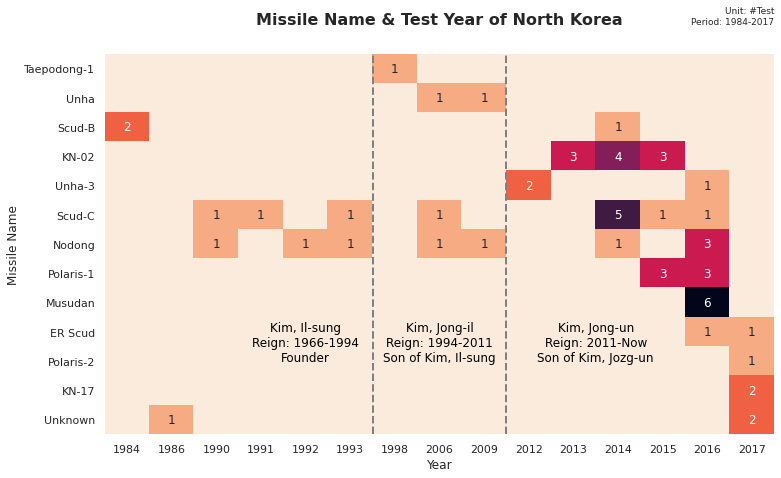

In [12]:
df_Missle = pd.pivot_table(df, values="# Test", index=['Year', 'Missile Name'], aggfunc=np.sum)

df_Missle.reset_index(level=0, inplace=True)
df_Missle.reset_index(level=0, inplace=True)
df_Missle_HM = df_Missle.pivot("Missile Name", "Year", "# Test").fillna(0).astype('int64')
df_Missle_HM = df_Missle_HM.reindex(['Taepodong-1','Unha','Scud-B','KN-02','Unha-3','Scud-C','Nodong','Polaris-1','Musudan','ER Scud','Polaris-2','KN-17','Unknown'])
labels =  df_Missle_HM.astype('int64').astype('str').replace("0", "")
fig = plt.figure(figsize=(12,7))
ax1 = sns.heatmap(df_Missle_HM, vmin=0, vmax=6, linewidths=0, cmap = "rocket_r", cbar=False, annot=labels, fmt = '')
ax1 = plt.axvline(6, 0, 15, color='gray', linestyle='--', linewidth='2')
ax1 = plt.axvline(9, 0, 15, color='gray', linestyle='--', linewidth='2')
ax1 = plt.text(4.5, 10.5, 'Kim, Il-sung\nReign: 1966-1994\nFounder', fontsize=12, color='black', horizontalalignment='center')
ax1 = plt.text(7.5, 10.5, 'Kim, Jong-il\nReign: 1994-2011\nSon of Kim, Il-sung', fontsize=12, color='black', horizontalalignment='center')
ax1 = plt.text(11, 10.5, 'Kim, Jong-un\nReign: 2011-Now\nSon of Kim, Jozg-un', fontsize=12, color='black', horizontalalignment='center')
plt.title('Unit: #Test\nPeriod: 1984-2017', fontsize = 9, loc='right')
plt.title('Missile Name & Test Year of North Korea',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30);

## Missile Base

In [14]:
XLS = '/home/aarush100616/Downloads/Projects/North Korea Missile Test Analysis/north_korea_missile_tests_database_050217.xlsx'
SHEET = 'Facilities'
df_location = pd.read_excel(open(XLS, 'rb'),sheet_name=SHEET)
df_location = df_location.drop([2, 15])
# Create a map
m_2 = folium.Map(location=[39.35, 126.55], tiles=None, zoom_start=6)
# Add points to the map
for idx, row in df_location.iterrows():
    Marker(location=[row['Latitude'], row['Longitude']], tooltip = row['Facility'], popup = row['Number of Tests']).add_to(m_2)
# Add select tiles
folium.TileLayer('Stamen Terrain').add_to(m_2)
folium.TileLayer('stamentoner').add_to(m_2)
folium.TileLayer('cartodbpositron').add_to(m_2)
folium.TileLayer('cartodbdark_matter').add_to(m_2)
folium.LayerControl().add_to(m_2)
# Display the map
m_2

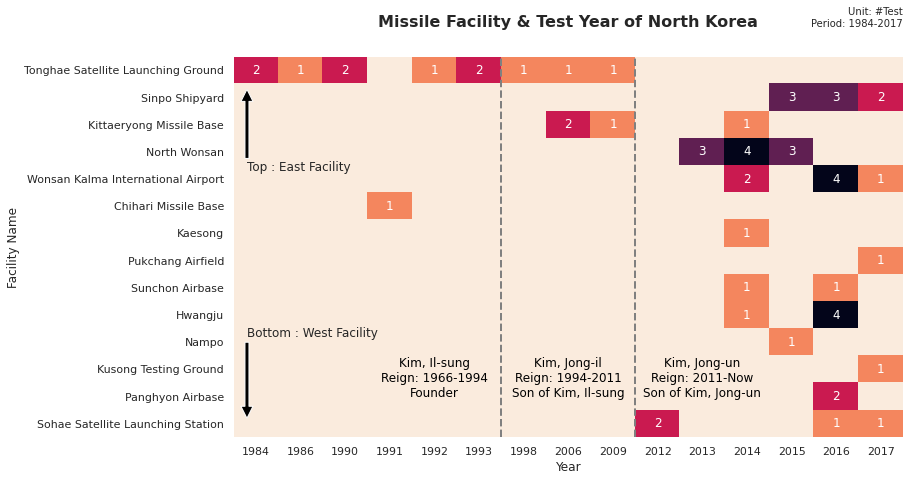

In [15]:
df_location = pd.pivot_table(df, values="# Test", index=['Year', 'Facility Name'], aggfunc=np.sum)
df_location.reset_index(level=0, inplace=True)
df_location.reset_index(level=0, inplace=True)
df_location = df_location.pivot("Facility Name", "Year", "# Test").fillna(0).astype('int64')
align_t = df[['Facility Name','Facility Longitude']].drop_duplicates().drop(55).sort_values('Facility Longitude', ascending=False)['Facility Name'].to_list()
df_location = df_location.reindex(align_t)
df_location = pd.pivot_table(df, values="# Test", index=['Year', 'Facility Name'], aggfunc=np.sum)
df_location.reset_index(level=0, inplace=True)
df_location.reset_index(level=0, inplace=True)
df_location = df_location.pivot("Facility Name", "Year", "# Test").fillna(0).astype('int64')
align_t = df[['Facility Name','Facility Longitude']].drop_duplicates().drop(55).sort_values('Facility Longitude', ascending=False)['Facility Name'].to_list()
df_location = df_location.reindex(align_t)
labels = df_location.astype('int64').astype('str').replace("0", "")
fig = plt.figure(figsize=(12,7))
ax1 = sns.heatmap(df_location, vmin=0, vmax=4, linewidths=0, cmap = "rocket_r", cbar=False, annot=labels, fmt = '')
ax1 = plt.axvline(6, 0, 15, color='gray', linestyle='--', linewidth='2')
ax1 = plt.axvline(9, 0, 15, color='gray', linestyle='--', linewidth='2')
ax1 = plt.text(4.5, 12.5, 'Kim, Il-sung\nReign: 1966-1994\nFounder', fontsize=12, color='black', horizontalalignment='center')
ax1 = plt.text(7.5, 12.5, 'Kim, Jong-il\nReign: 1994-2011\nSon of Kim, Il-sung', fontsize=12, color='black', horizontalalignment='center')
ax1 = plt.text(10.5, 12.5, 'Kim, Jong-un\nReign: 2011-Now\nSon of Kim, Jong-un', fontsize=12, color='black', horizontalalignment='center')
ax1 = plt.annotate('Top : East Facility', xy=(0.3,1.2), xytext=(0.3,4.2),arrowprops=dict(facecolor='black'))
ax1 = plt.annotate('Bottom : West Facility', xy=(0.3,13.3), xytext=(0.3,10.3),arrowprops=dict(facecolor='black'))
plt.title('Unit: #Test\nPeriod: 1984-2017', fontsize = 10, loc='right')
plt.title('Missile Facility & Test Year of North Korea',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30);

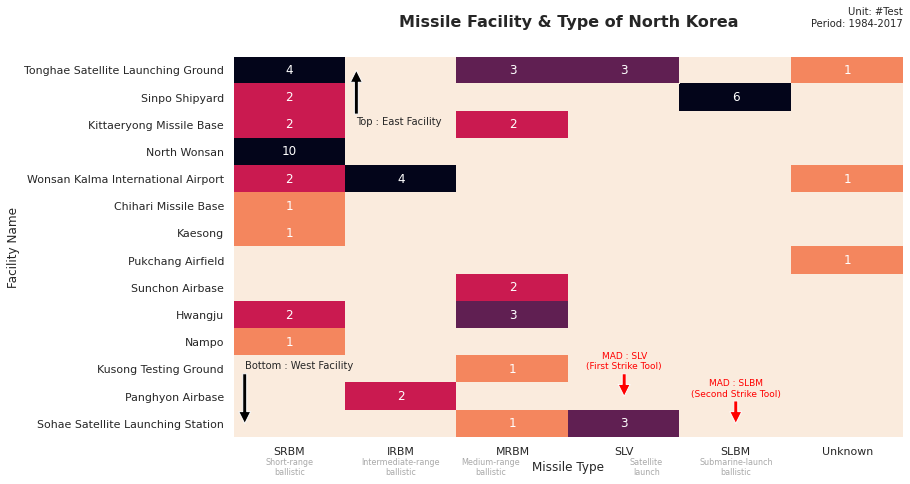

In [16]:
df_location = pd.pivot_table(df, values="# Test", index=['Missile Type', 'Facility Name'], aggfunc=np.sum)
df_location.reset_index(level=0, inplace=True)
df_location.reset_index(level=0, inplace=True)
df_location = df_location.pivot("Facility Name", "Missile Type", "# Test").fillna(0).astype('int64')
align_t = df[['Facility Name','Facility Longitude']].drop_duplicates().drop(55).sort_values('Facility Longitude', ascending=False)['Facility Name'].to_list()

df_location = df_location.reindex(align_t)
df_location = df_location[['SRBM','IRBM','MRBM','SLV','SLBM','Unknown']]
labels =  df_location.astype('int64').astype('str').replace("0", "")
labels = labels[['SRBM','IRBM','MRBM','SLV','SLBM','Unknown']]
fig = plt.figure(figsize=(12,7))
ax1 = sns.heatmap(df_location, vmin=0, vmax=4, linewidths=0, cmap = "rocket_r", cbar=False, annot=labels, fmt = '')
ax1 = plt.annotate('Top : East Facility', xy=(1.1,0.5), xytext=(1.1,2.5),arrowprops=dict(facecolor='black'), fontsize=10)
ax1 = plt.annotate('Bottom : West Facility', xy=(0.1,13.5), xytext=(0.1,11.5),arrowprops=dict(facecolor='black'), fontsize=10)
ax1 = plt.annotate('MAD : SLV\n(First Strike Tool)', xy=(3.5,12.5), xytext=(3.5,11.5),arrowprops=dict(facecolor='red'), fontsize=9, color='red', horizontalalignment='center')
ax1 = plt.annotate('MAD : SLBM\n(Second Strike Tool)', xy=(4.5,13.5), xytext=(4.5,12.5),arrowprops=dict(facecolor='red'), fontsize=9, color='red', horizontalalignment='center')
ax1 = plt.text(0.5, 15.1, 'Short-range\nballistic', fontsize=8, color='darkgray', horizontalalignment='center', verticalalignment='center')
ax1 = plt.text(1.5, 15.1, 'Intermediate-range\nballistic', fontsize=8, color='darkgray', horizontalalignment='center', verticalalignment='center')
ax1 = plt.text(2.3, 15.1, 'Medium-range\nballistic', fontsize=8, color='darkgray', horizontalalignment='center', verticalalignment='center')
ax1 = plt.text(3.7, 15.1, 'Satellite\nlaunch', fontsize=8, color='darkgray', horizontalalignment='center', verticalalignment='center')
ax1 = plt.text(4.5, 15.1, 'Submarine-launch\nballistic', fontsize=8, color='darkgray', horizontalalignment='center', verticalalignment='center')
plt.title('Unit: #Test\nPeriod: 1984-2017', fontsize = 10, loc='right')
plt.title('Missile Facility & Type of North Korea',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30);

## Conclusion

Relations between the US and China are getting worse, and East Asian countries are repeating conflicts and cooperation over economic, territorial and diplomatic issues. And North Korea is located in the buffer zone of all these conflicts and cooperation.Although it ended in failure, North Korea has not conducted any more missile provocations since the inter-Korean summit and talks with Trump. However, there is no further conversation. It remains to be seen whether this is the uncomfortable peace that Kim Jong-un has sought due to MAD, or whether he and his neighbors have other ideas for the future.